In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_metrics as km
from sklearn.model_selection import train_test_split
from keras import regularizers

Using TensorFlow backend.


In [2]:
data = keras.datasets.imdb

In [3]:
max_word = 10000    #只考虑前1万个单词的编码，后面的都抛弃掉，所以编码的整数索引不会超过10000
(x_train, y_train), (x_test, y_test) = data.load_data(num_words = max_word)

/home/xuxiang/anaconda3/envs/tf22/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/xuxiang/anaconda3/envs/tf22/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
x_train.shape, y_train.shape  #y_train就是label

((25000,), (25000,))

In [5]:
x_test.shape, y_test.shape

((25000,), (25000,))

In [6]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [7]:
word_index = data.get_word_index()  #下载word跟index对应的json文件

word2vec：把文本训练成密集向量

In [8]:
[len(x) for x in x_train]  #可以看到评论的长度不尽相同，因为要放到lstm/gru/全连接就需要固定长度，所以要填充

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [9]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,300)  #短的就填充，长的就截断
x_test = keras.preprocessing.sequence.pad_sequences(x_test,300)

In [10]:
[len(x) for x in x_train]

[300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300

In [11]:
x_train[0]   #可以看到每条评论已经被处理成长度为300的向量了

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   

In [12]:
x_train.shape  #可得训练数据大小为25000个，长度为300的

(25000, 300)

In [13]:
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)
print(len(x_train),len(x_valid),len(x_test))

25000 12500 12500


In [14]:
model = keras.models.Sequential()
model.add(layers.Embedding(10000,50,input_length=300))  #(输入数据的维度，50，input_dim=输入的长度)
model.add(layers.Flatten())  #因为现在是三维的，[25000,300,5],flatten把后面两维展平
#model.add(layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.SimpleRNN(32))
#model.add(tf.keras.layers.GRU(32))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001),#在权重参数w添加L1正则化
                bias_regularizer=regularizers.l2(0.001),#在偏置向量b添加L2正则化
                activity_regularizer=regularizers.l1_l2(0.001)))#在输出部分添加L1和L2结合的正则化
#model.add(tf.keras.layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))  #二分类问题，最后输出是是或否，用sigmoid激活

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                480032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 980,065
Trainable params: 980,065
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['acc', km.binary_precision(), km.binary_recall(),km.f1_score()]
              )   #二分类问题，loss用二元交叉熵

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn


In [17]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
callbacks_list = [
    EarlyStopping(
        monitor = 'val_acc', #监控验证精度
        patience = 2, #如果验证精度多于三轮不改善则中断训练
        mode='max'),
    #在训练的过程中不断得保存最优的模型
    ModelCheckpoint(
        filepath = 'my_model_lstm.h5', #模型保存路径
        monitor = 'val_acc', #监控验证精度
        
        save_best_only = True, #如果val_accuracy没有改善则不需要覆盖模型
    )
]


In [18]:
history = model.fit(x_train,y_train,epochs=15,batch_size=256,callbacks=callbacks_list,validation_data=(x_valid,y_valid))

Epoch 1/15
98/98 [==============================] - 3s 26ms/step - loss: 1.2095 - acc: 0.5017 - precision: 0.5008 - recall: 0.4768 - f1_score: 0.4750 - val_loss: 0.7535 - val_acc: 0.5014 - val_precision: 0.5004 - val_recall: 0.6261 - val_f1_score: 0.5555
Epoch 2/15
98/98 [==============================] - 2s 19ms/step - loss: 0.7528 - acc: 0.5026 - precision: 0.5012 - recall: 0.6802 - f1_score: 0.5770 - val_loss: 0.7520 - val_acc: 0.5014 - val_precision: 0.5012 - val_recall: 0.6850 - val_f1_score: 0.5788
Epoch 3/15
98/98 [==============================] - 2s 19ms/step - loss: 0.7524 - acc: 0.5017 - precision: 0.5018 - recall: 0.7138 - f1_score: 0.5893 - val_loss: 0.7529 - val_acc: 0.5086 - val_precision: 0.5019 - val_recall: 0.6800 - val_f1_score: 0.5774
Epoch 4/15
98/98 [==============================] - 2s 18ms/step - loss: 0.7517 - acc: 0.4954 - precision: 0.5020 - recall: 0.6138 - f1_score: 0.5522 - val_loss: 0.7516 - val_acc: 0.4986 - val_precision: 0.5015 - val_recall: 0.5588 - v

In [19]:
history.history.keys()

dict_keys(['loss', 'acc', 'precision', 'recall', 'f1_score', 'val_loss', 'val_acc', 'val_precision', 'val_recall', 'val_f1_score'])

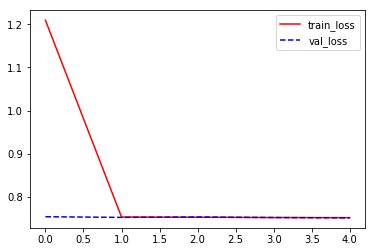

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.epoch, history.history.get('loss'), 'r', label='train_loss')
plt.plot(history.epoch, history.history.get('val_loss'),'b--', label='val_loss')
plt.legend()

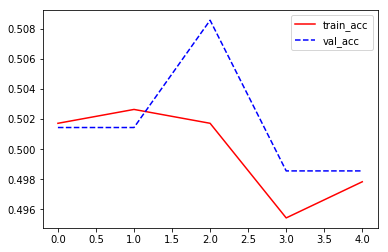

In [21]:
plt.plot(history.epoch, history.history.get('acc'), 'r', label='train_acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b--', label='val_acc')
plt.legend()  

In [22]:
from tensorflow.keras.models import load_model
model = load_model('my_model_lstm.h5',custom_objects={'binary_precision':km.precision(),'binary_recall':km.recall(),'binary_f1_score':km.f1_score()})
model.evaluate(x_test, y_test)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
391/391 [==============================] - 1s 2ms/step - loss: 0.7529 - acc: 0.5130 - precision: 0.5803 - recall: 0.1021 - f1_score: 0.1737


[0.7529342770576477,
 0.5130400061607361,
 0.5803472399711609,
 0.1021495908498764,
 0.17365537583827972]